# 120 de História Olímpica

Base de dados retirado do kaggle: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [146]:
#Importando bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [72]:
#Lendo os dados
dados = pd.read_csv('athlete_events.csv')

In [73]:
#Verificando as 5 primeiras linhas do dataset
dados.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [74]:
# Renomeando as colunas
dados.columns = ['ID', 'Nome', 'Sexo', 'Idade', 'Altura', 'Peso', 'Time','NOC', 'AnoEstacao', 'Ano', 'Estacao', 'Cidade', 'Esporte', 'Evento', 'Medalha']

In [75]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          271116 non-null  int64  
 1   Nome        271116 non-null  object 
 2   Sexo        271116 non-null  object 
 3   Idade       261642 non-null  float64
 4   Altura      210945 non-null  float64
 5   Peso        208241 non-null  float64
 6   Time        271116 non-null  object 
 7   NOC         271116 non-null  object 
 8   AnoEstacao  271116 non-null  object 
 9   Ano         271116 non-null  int64  
 10  Estacao     271116 non-null  object 
 11  Cidade      271116 non-null  object 
 12  Esporte     271116 non-null  object 
 13  Evento      271116 non-null  object 
 14  Medalha     39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# Colunas do Conjunto de Dados

**ID** - Número único atribuido a cada atleta

**Nome** - Nome dos Atletas

**Sexo** - M or F

**Idade** - Inteiro

**Altura** - Em Centímetros

**Peso** - Em Quilos

**Time** - Nome do Time

**NOC** - Comite Olimpico Nacional( Código com três letras)

**AnoEstacao** - Ano e Estação

**Ano** - Inteiro

**Estacao** - Summer ou Winter

**Cidade** - Cidade Hóspede

**Esporte** - Esporte

**Evento** - Evento

**Medalha** - Gold, Silver, Bronze, or NA

### Missing Values

In [76]:
# Verificando a quantidade de missing values
dados.isnull().sum()

ID                 0
Nome               0
Sexo               0
Idade           9474
Altura         60171
Peso           62875
Time               0
NOC                0
AnoEstacao         0
Ano                0
Estacao            0
Cidade             0
Esporte            0
Evento             0
Medalha       231333
dtype: int64

In [77]:
#Tratando os missing values
dados['Idade'].fillna(dados['Idade'].mean(), inplace = True)
dados['Altura'].fillna(dados['Altura'].mean(), inplace = True)
dados["Peso"].fillna(dados['Peso'].mean(), inplace = True)
dados['Medalha'].fillna('SemMedalha', inplace = True)

In [78]:
# Excluindo colunas que não servirão para nossa análise
dados.drop(columns ='Nome', inplace = True)
dados.drop(columns = 'ID', inplace = True)
dados.drop(columns = 'NOC', inplace = True)
dados.drop(columns = 'AnoEstacao', inplace = True)

### Histograma: Idade, Peso e Altura

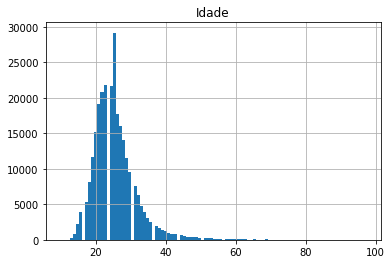

In [79]:
#Histograma Idade
dados.hist(column = 'Idade', bins = 100)
plt.show()

In [80]:
# A Maior Parte dos medalhistas esta concentrado entre 20 e 30 anos

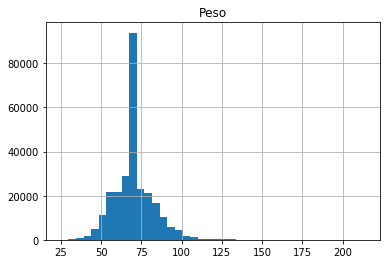

In [81]:
#Histograma Peso
dados.hist(column = 'Peso', bins = 40)
plt.show()

In [82]:
# A maior quantidade de medalhistas tem o peso entre 52 a 80 kg

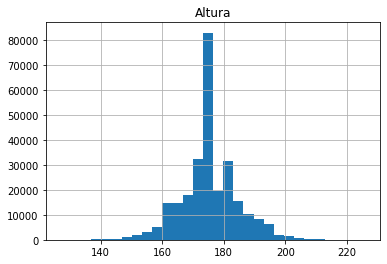

In [83]:
#Histograma Altura
dados.hist(column = 'Altura', bins = 30)
plt.show()

In [84]:
# A maior parte dos medalhistas tem a altura concentrada entre 1,60 m e 1,80 m

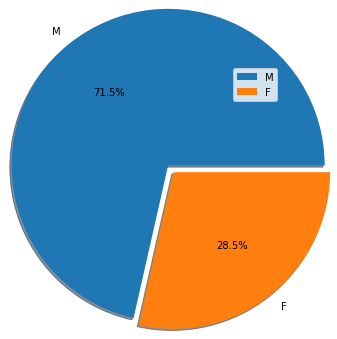

In [155]:
# É Possivel observar através do gráfico de pizza que o número de mulheres ao longo desses anos é bem maior que 
# o número de homens.
%matplotlib inline
total = dados.Sexo.value_counts()
explode = [0.1,0]
plt.pie(total, labels = ('M', 'F'), autopct = '%1.1f%%', radius=1.8, shadow = True, explode = explode)
plt.legend()
plt.show()

### Gráfico que relaciona Medalhas com Sexo

(array([0, 1]), <a list of 2 Text xticklabel objects>)

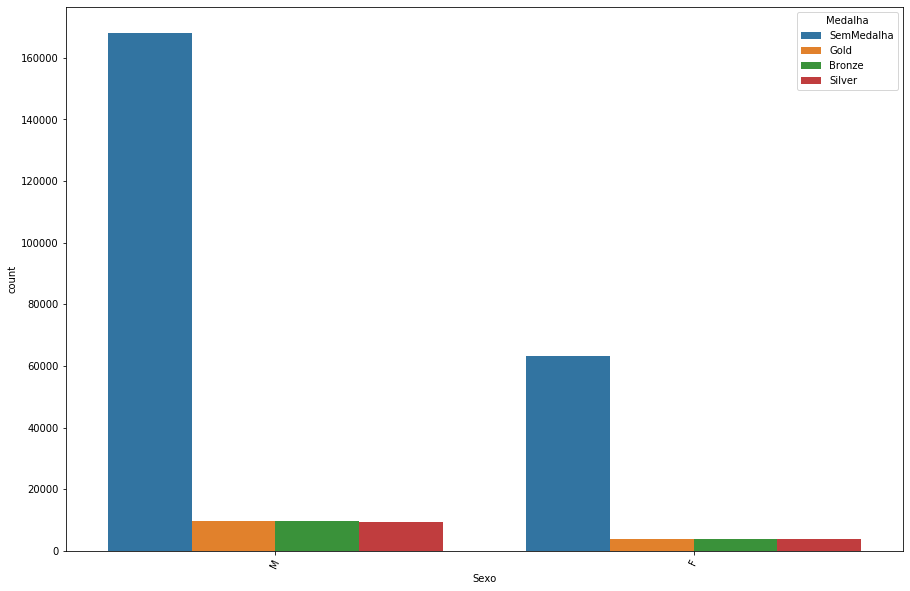

In [85]:
# Distribuição das Medalhas por Sexo
plt.figure(figsize=(15,10))
sns.countplot(data=dados, x = 'Sexo',  hue = 'Medalha')
plt.xticks(rotation=65)

In [87]:
#Agrupando quantidade de medalhas por sexo
dados.groupby('Sexo')['Medalha'].value_counts()

Sexo  Medalha   
F     SemMedalha     63269
      Bronze          3771
      Gold            3747
      Silver          3735
M     SemMedalha    168064
      Gold            9625
      Bronze          9524
      Silver          9381
Name: Medalha, dtype: int64

In [ ]:
# Note que a maior parte das medalhas de ouro foram conquistadas pelas mulheres.

### Tratando Outliers

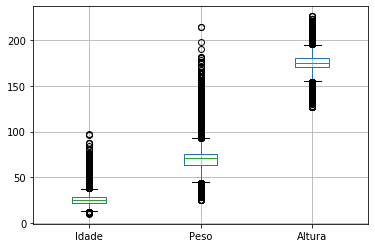

In [88]:
dados.boxplot(column = ['Idade', 'Peso', 'Altura'])
plt.show()

In [89]:
#Verificando os outliers
dados.Idade.loc[dados.Idade > 40]

58        54.0
89        43.0
90        47.0
124       41.0
126       45.0
          ... 
270752    42.0
270753    42.0
270955    41.0
270971    43.0
270972    47.0
Name: Idade, Length: 7701, dtype: float64

In [90]:
#Contabilizando os outliers superiores
(len(dados.Idade.loc[dados.Idade > 40].value_counts())/len(dados.Sexo))*100

0.01586036973103764

In [91]:
#Repare que o percentual de outliers referentes a Idade é muito pequeno
#Por esse motivo vamos excluir esses outliers
dados = dados.query('Idade<=40')

In [92]:
#Repare que o percentual de outliers referentes a Peso é muito pequeno
#Por esse motivo vamos excluir esses outliers
perPeso = (len(dados.Peso.loc[dados.Peso > 100].value_counts())/len(dados.Sexo))*100
dados = dados.query('Peso<=100')

In [93]:
#Repare que o percentual de outliers referentes a Peso é muito pequeno
#Por esse motivo vamos excluir esses outliers
(len(dados.Altura.loc[dados.Altura > 200].value_counts())/len(dados.Sexo))*100
dados = dados.query('Altura <= 200')

* **Excluimos aproximadamente 5 por cento dos dados**

### Tratando variáveis categóricas

In [94]:
# Tratando a caluna Medalha
dados.Medalha.replace('Gold', 0, inplace = True)
dados.Medalha.replace('Silver', 1, inplace = True)
dados.Medalha.replace('Bronze', 2, inplace = True)
dados.Medalha.replace('SemMedalha', 3, inplace = True)

In [95]:
# Tratando a coluna estação
dados.Estacao.replace('Winter', 1, inplace = True)
dados.Estacao.replace('Summer', 2, inplace = True)

In [156]:
# Transformando colunas categóricas em numéricas

#num = ['Sexo', 'Time', 'Esporte', 'Evento', 'Cidade']

#for x in num:
#    dados = pd.get_dummies(dados, columns = [x], prefix = [x], sparse = True, drop_first=True
                                                                                                    

### Transformando dados categóricos em numéricos

In [97]:
# A escolha pelo Label Encoder se deu, pois após testar o OneHotEncoder, este apesar de apresentar uma acurácia de 91,6%
# gerou muito custo para o modelo. 
# Supondo a situação em que o modelo fosse para produção e recebesse uma carga maior de dados, isso o tornaria inviável.
# O Label Encoder apresentou uma boa acurácia e teve um processamento muito mais rápido. E por isso é melhor para a nossa
# Situação.
enc = LabelEncoder()

In [98]:
num = ['Sexo', 'Time', 'Esporte','Evento', 'Cidade']

for x in num:
    inteiros = enc.fit_transform(dados[x])
    dados[x] = inteiros

### Separando Dados de treino e Teste

In [99]:
classe = dados['Medalha']
treino = dados.drop(columns = 'Medalha', axis = 1, inplace = True)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dados, classe,test_size=0.3)

### Instanciando o modelo - random forest

In [107]:
random_clf = RandomForestClassifier(random_state=0)

### Treinando o Modelo

In [108]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Executando o Modelo

In [109]:
resultado = random_clf.predict(X_test)
resultado

array([3, 0, 0, ..., 3, 3, 3], dtype=int64)

### Cross Validation

In [110]:
#from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_clf, dados, classe)
scores

array([0.90072922, 0.89783179, 0.89660671, 0.89837628, 0.89448507])

In [111]:
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.72      0.43      0.54      3757
           1       0.66      0.32      0.43      3585
           2       0.68      0.28      0.40      3725
           3       0.91      0.99      0.95     66071

    accuracy                           0.89     77138
   macro avg       0.74      0.50      0.58     77138
weighted avg       0.88      0.89      0.88     77138



### Executando a Função Acurácia

In [112]:
# Testando a acurácia do modelo
#def Acuracia(random_clf,X,y):
#    resultados = cross_val_predict(random_clf, X, y)
#    return metrics.accuracy_score(y,resultados)

In [113]:
Acuracia(random_clf,dados,classe)

0.8976058244271247

## <span style = "color:Blue"> Tunning do Modelo </span>
Fazer um Tunning dos modelos e verificar o melhor resultado.

* Defina os melhores Hyperparametros para os algoritmos utilizando o GridSearch.

* Implemente usando Pipelines.

* Avalie os modelos usando Cross Validation (Utilize o recuso já integrado ao Pipeline).

#### Criando Pipelines

In [150]:
pip_1 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier())
])

pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(max_depth = 5))
])

pip_3 = Pipeline([
    ('standardscaler', StandardScaler()),
    ('clf', RandomForestClassifier(max_depth = 3))
])
 
pip_4 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clft', DecisionTreeClassifier())
])

pip_5 = Pipeline([
    ('standardscaler', StandardScaler()),
    ('clft', DecisionTreeClassifier(max_depth = 5))
])

pip_6 = Pipeline([
    ('standardscaler', StandardScaler()),
    ('clt', KNeighborsClassifier(n_neighbors=3))
])

pip_7 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clt', KNeighborsClassifier(n_neighbors = 5))
])

In [119]:
pip_1.fit(X_train, y_train)
acuracia1 = pip_1.score(X_test, y_test)
acuracia1

0.8931006767092743

In [120]:
pip_2.fit(X_train, y_train)
acuracia2 = pip_2.score(X_test, y_test)
acuracia2

0.8565298555834997

In [121]:
pip_3.fit(X_train, y_train)
acuracia3 = pip_3.score(X_test, y_test)
acuracia3

0.8565298555834997

In [133]:
pip_4.fit(X_train, y_train)
acuracia4 = pip_4.score(X_test, y_test)
acuracia4

0.8553631154554175

In [134]:
pip_5.fit(X_train, y_train)
acuracia5 = pip_5.score(X_test, y_test)
acuracia5

0.8587985169436594

In [148]:
pip_6.fit(X_train, y_train)
acuracia6 = pip_6.score(X_test, y_test)
acuracia6

0.8269724390054188

In [151]:
pip_7.fit(X_train, y_train)
acuracia7 = pip_7.score(X_test, y_test)
acuracia7

0.8485182400373357

### Pipeline Final

In [135]:
pip_final = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier())
])


pip_final.fit(X_train, y_train)

pip_final.predict(X_test)

array([3, 0, 0, ..., 3, 3, 3], dtype=int64)

### Grid Search

In [140]:
# Parametros para o GridSearch
param_grid = dict(clf__max_depth=[3,4,5,6,7,8,9,10])
# Criar objeto GridSearch com os parâmetros definidos e a configuração de validação cruzada com 5 folds
grid = GridSearchCV(pip_final,param_grid = paramet_grid, cv = 5, scoring = 'accuracy')

In [141]:
# Executando GridSearch
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('min_max_scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                         

In [142]:
grid.cv_results_

{'mean_fit_time': array([ 7.51519504,  9.0068244 , 10.46463332, 11.9865665 , 13.43977232,
        14.69296112, 15.76909018, 16.92535644]),
 'std_fit_time': array([0.16037982, 0.14832265, 0.20486171, 0.31541999, 0.34381592,
        0.31125331, 0.31865096, 0.12634525]),
 'mean_score_time': array([0.40194473, 0.42036195, 0.45927396, 0.51733975, 0.55303583,
        0.62915082, 0.66623683, 0.74019032]),
 'std_score_time': array([0.0257979 , 0.00911055, 0.00480819, 0.01831241, 0.00311836,
        0.04189126, 0.00482135, 0.01474198]),
 'param_clf__max_depth': masked_array(data=[3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__max_depth': 3},
  {'clf__max_depth': 4},
  {'clf__max_depth': 5},
  {'clf__max_depth': 6},
  {'clf__max_depth': 7},
  {'clf__max_depth': 8},
  {'clf__max_depth': 9},
  {'clf__max_depth': 10}],
 'split0_test_score': array([0.85421412, 0.85421412, 0.

In [143]:
# Verificando os melhores parâmetros
grid.best_params_

{'clf__max_depth': 10}

In [144]:
# Verificando o melhor resultado
grid.best_score_

0.8604224792312707